In [257]:
import pandas as pd
import numpy as np
import os


In [258]:
train_df = pd.read_csv('../data/raw/train.csv',index_col='PassengerId')
test_df = pd.read_csv('../data/raw/test.csv',index_col='PassengerId')

In [259]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Ticket      418 non-null object
Fare        417 non-null float64
Cabin       91 non-null object
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [260]:
test_df['Survived'] = -888

df = pd.concat((train_df,test_df),axis=0)

In [261]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
Fare        1308 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


In [262]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
Fare        1308 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


In [263]:
df[df.Embarked.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
62,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,1,female,0,1,113572
830,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,1,female,0,1,113572


In [264]:
df.Embarked.value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [265]:
pd.crosstab(df[df.Survived!=-888].Survived,df[df.Survived!=-888].Embarked)

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


In [266]:
df[['Embarked','Pclass','Fare']]
df.groupby(['Embarked','Pclass']).Fare.median()

Embarked  Pclass
C         1         76.7292
          2         15.3146
          3          7.8958
Q         1         90.0000
          2         12.3500
          3          7.7500
S         1         52.0000
          2         15.3750
          3          8.0500
Name: Fare, dtype: float64

In [267]:
df.Embarked.fillna('C',inplace=True)

In [268]:
df[df.Embarked.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,


In [269]:
median_fare=df.loc[(df.Pclass==3)&(df.Embarked=='S')].Fare.median()

In [270]:
print(median_fare)

8.05


In [271]:
df[df.Fare.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1044,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,3,male,0,-888,3701


In [272]:
df.Fare.fillna(median_fare,inplace=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1bcde68278>]], dtype=object)

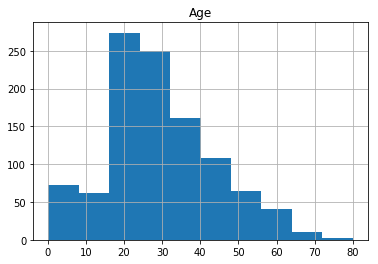

In [273]:
%matplotlib inline

# df[df.Age.isnull()==False].hist()
df.hist(column='Age')

In [274]:
df.groupby('Sex').Age.median()

Sex
female    27.0
male      28.0
Name: Age, dtype: float64

/home/abhishek/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


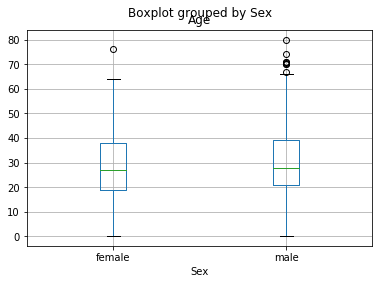

In [275]:
df[df.Age.notnull()].boxplot('Age','Sex')

In [276]:
def GetTitle(name):
    first_name_with_title = name.split(',')[1]
    title = first_name_with_title.split('.')[0]
    title = title.strip().lower()
    return title


In [277]:
df.Name.map(lambda x: GetTitle(x)).unique()

array(['mr', 'mrs', 'miss', 'master', 'don', 'rev', 'dr', 'mme', 'ms',
       'major', 'lady', 'sir', 'mlle', 'col', 'capt', 'the countess',
       'jonkheer', 'dona'], dtype=object)

In [278]:
df['Title'] = df.Name.map(lambda x:GetTitle(x))

In [279]:
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title
PassengerId,,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0,A/5 21171,mr
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1,PC 17599,mrs
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1,STON/O2. 3101282,miss
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1,113803,mrs
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0,373450,mr


/home/abhishek/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


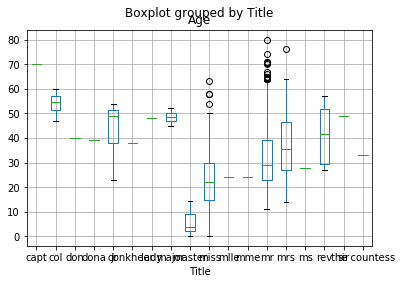

In [280]:
df[df.Age.notnull()].boxplot('Age','Title');

In [281]:
titel_age_median = df.groupby('Title').Age.transform('median')

In [282]:
titel_age_median

PassengerId
1       29.0
2       35.5
3       22.0
4       35.5
5       29.0
6       29.0
7       29.0
8        4.0
9       35.5
10      35.5
11      22.0
12      22.0
13      29.0
14      29.0
15      22.0
16      35.5
17       4.0
18      29.0
19      35.5
20      35.5
21      29.0
22      29.0
23      22.0
24      29.0
25      22.0
26      35.5
27      29.0
28      29.0
29      22.0
30      29.0
        ... 
1280    29.0
1281     4.0
1282    29.0
1283    35.5
1284     4.0
1285    29.0
1286    29.0
1287    35.5
1288    29.0
1289    35.5
1290    29.0
1291    29.0
1292    22.0
1293    29.0
1294    22.0
1295    29.0
1296    29.0
1297    29.0
1298    29.0
1299    29.0
1300    22.0
1301    22.0
1302    22.0
1303    35.5
1304    22.0
1305    29.0
1306    39.0
1307    29.0
1308    29.0
1309     4.0
Name: Age, Length: 1309, dtype: float64

In [283]:
df.Age.fillna(titel_age_median,inplace=True)

In [284]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 12 columns):
Age         1309 non-null float64
Cabin       295 non-null object
Embarked    1309 non-null object
Fare        1309 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
Title       1309 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 172.9+ KB


In [285]:
df['AgeState'] = np.where(df['Age']>=10,'Adult','Child')

In [286]:
df['AgeState'].value_counts()

Adult    1219
Child      90
Name: AgeState, dtype: int64

In [287]:
pd.crosstab(df[df.Survived!=-888].Survived,df[df.Survived!=-888].AgeState)

AgeState,Adult,Child
Survived,,
0,523,26
1,302,40


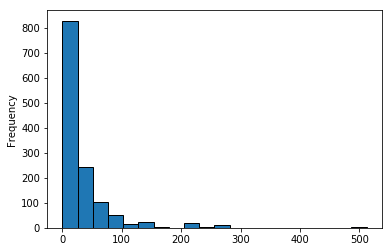

In [288]:
df.Fare.plot(kind='hist', edgecolor='black', bins=20);

# df[['SibSp','Parch']]


In [289]:
df[df.Fare == df.Fare.max()]



,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title,AgeState
PassengerId,,,,,,,,,,,,,
259,35.0,NaN,C,512.3292,"Ward, Miss. Anna",0,1,female,0,1,PC 17755,miss,Adult
680,36.0,B51 B53 B55,C,512.3292,"Cardeza, Mr. Thomas Drake Martinez",1,1,male,0,1,PC 17755,mr,Adult
738,35.0,B101,C,512.3292,"Lesurer, Mr. Gustave J",0,1,male,0,1,PC 17755,mr,Adult
1235,58.0,B51 B53 B55,C,512.3292,"Cardeza, Mrs. James Warburton Martinez (Charlo...",1,1,female,0,-888,PC 17755,mrs,Adult


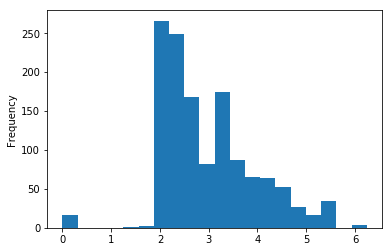

In [290]:
LogFare = np.log(df.Fare+1)
LogFare.plot(kind='hist',bins=20)

In [291]:
df['FamlySize'] = df.Parch +  df.SibSp +1

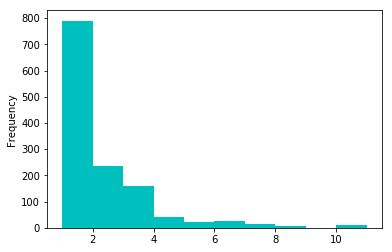

In [292]:
df['FamlySize'].plot(kind='hist',color='c')



In [293]:
pd.qcut(df.Fare, 4)

PassengerId
1         (-0.001, 7.896]
2       (31.275, 512.329]
3         (7.896, 14.454]
4       (31.275, 512.329]
5         (7.896, 14.454]
6         (7.896, 14.454]
7       (31.275, 512.329]
8        (14.454, 31.275]
9         (7.896, 14.454]
10       (14.454, 31.275]
11       (14.454, 31.275]
12       (14.454, 31.275]
13        (7.896, 14.454]
14       (14.454, 31.275]
15        (-0.001, 7.896]
16       (14.454, 31.275]
17       (14.454, 31.275]
18        (7.896, 14.454]
19       (14.454, 31.275]
20        (-0.001, 7.896]
21       (14.454, 31.275]
22        (7.896, 14.454]
23        (7.896, 14.454]
24      (31.275, 512.329]
25       (14.454, 31.275]
26      (31.275, 512.329]
27        (-0.001, 7.896]
28      (31.275, 512.329]
29        (-0.001, 7.896]
30        (-0.001, 7.896]
              ...        
1280      (-0.001, 7.896]
1281     (14.454, 31.275]
1282    (31.275, 512.329]
1283    (31.275, 512.329]
1284     (14.454, 31.275]
1285      (7.896, 14.454]
1286     (14.454, 31.275]


In [294]:
pd.qcut(df.Fare,4,labels=['very_low','low','high','very_high'])

PassengerId
1        very_low
2       very_high
3             low
4       very_high
5             low
6             low
7       very_high
8            high
9             low
10           high
11           high
12           high
13            low
14           high
15       very_low
16           high
17           high
18            low
19           high
20       very_low
21           high
22            low
23            low
24      very_high
25           high
26      very_high
27       very_low
28      very_high
29       very_low
30       very_low
          ...    
1280     very_low
1281         high
1282    very_high
1283    very_high
1284         high
1285          low
1286         high
1287    very_high
1288     very_low
1289    very_high
1290     very_low
1291     very_low
1292    very_high
1293         high
1294    very_high
1295    very_high
1296         high
1297          low
1298          low
1299    very_high
1300     very_low
1301          low
1302     very_low
1303    very_hig

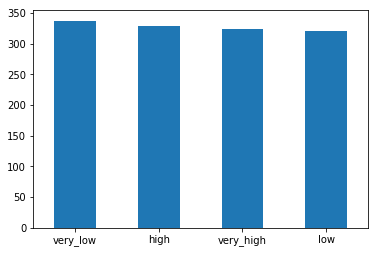

In [295]:
pd.qcut(df.Fare, 4, labels=['very_low', 'low', 'high', 'very_high']).value_counts().plot(kind='bar', rot=0);


In [296]:
df['Fare_Bin'] = pd.qcut(df.Fare, 4, labels=['very_low', 'low', 'high', 'very_high'])


In [297]:
df.loc[df.FamlySize==df.FamlySize.max(),['Name','Survived','FamlySize','Ticket']]

,Name,Survived,FamlySize,Ticket
PassengerId,,,,
160,"Sage, Master. Thomas Henry",0,11,CA. 2343
181,"Sage, Miss. Constance Gladys",0,11,CA. 2343
202,"Sage, Mr. Frederick",0,11,CA. 2343
325,"Sage, Mr. George John Jr",0,11,CA. 2343
793,"Sage, Miss. Stella Anna",0,11,CA. 2343
847,"Sage, Mr. Douglas Bullen",0,11,CA. 2343
864,"Sage, Miss. Dorothy Edith ""Dolly""",0,11,CA. 2343
1080,"Sage, Miss. Ada",-888,11,CA. 2343
1234,"Sage, Mr. John George",-888,11,CA. 2343


In [298]:
pd.crosstab(df[df.Survived!=-888].Survived,df[df.Survived!=-888].FamlySize)

FamlySize,1,2,3,4,5,6,7,8,11
Survived,,,,,,,,,
0,374,72,43,8,12,19,8,6,7
1,163,89,59,21,3,3,4,0,0


In [299]:
df['IsMother'] = np.where((df.Sex=='female') & (df.Parch>0) & (df.Age>18) & (df.Title!='Miss'),1,0)

In [300]:
pd.crosstab(df[df.Survived!=-888].Survived , df[df.Survived!=-888].IsMother)

IsMother,0,1
Survived,,
0,524,25
1,291,51


In [301]:
df['IsMale'] = np.where(df.Sex=='male',1,0)
df.Cabin

PassengerId
1               NaN
2               C85
3               NaN
4              C123
5               NaN
6               NaN
7               E46
8               NaN
9               NaN
10              NaN
11               G6
12             C103
13              NaN
14              NaN
15              NaN
16              NaN
17              NaN
18              NaN
19              NaN
20              NaN
21              NaN
22              D56
23              NaN
24               A6
25              NaN
26              NaN
27              NaN
28      C23 C25 C27
29              NaN
30              NaN
           ...     
1280            NaN
1281            NaN
1282            B24
1283            D28
1284            NaN
1285            NaN
1286            NaN
1287            C31
1288            NaN
1289            B41
1290            NaN
1291            NaN
1292             C7
1293            NaN
1294            NaN
1295            NaN
1296            D40
1297            D38
1298    

In [302]:
df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6', 'C23 C25 C27',
       'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33', 'F G73', 'E31',
       'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101', 'F E69', 'D47',
       'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4', 'A32', 'B4',
       'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35', 'C87', 'B77',
       'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19', 'B49', 'D',
       'C22 C26', 'C106', 'C65', 'E36', 'C54', 'B57 B59 B63 B66', 'C7',
       'E34', 'C32', 'B18', 'C124', 'C91', 'E40', 'T', 'C128', 'D37',
       'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34', 'C104', 'C111',
       'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37', 'C30', 'D20',
       'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39', 'B22', 'C86',
       'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41', 'A20', 'D19',
       'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58', 'C126', 'B71',
       'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63', 'C62 C64', 'E24',

In [303]:
df.loc[df.Cabin=='T']

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title,AgeState,FamlySize,Fare_Bin,IsMother,IsMale
PassengerId,,,,,,,,,,,,,,,,,
340,45.0,T,S,35.5,"Blackwell, Mr. Stephen Weart",0,1,male,0,0,113784,mr,Adult,1,very_high,0,1


In [304]:
df.loc[df.Cabin=='T','Cabin']=np.NaN
# df = pd.get_dummies(df,columns=['Deck','Pclass','Title','Fare_Bin','Embarked','AgeState'])
df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6', 'C23 C25 C27',
       'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33', 'F G73', 'E31',
       'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101', 'F E69', 'D47',
       'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4', 'A32', 'B4',
       'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35', 'C87', 'B77',
       'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19', 'B49', 'D',
       'C22 C26', 'C106', 'C65', 'E36', 'C54', 'B57 B59 B63 B66', 'C7',
       'E34', 'C32', 'B18', 'C124', 'C91', 'E40', 'C128', 'D37', 'B35',
       'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34', 'C104', 'C111', 'C92',
       'E38', 'D21', 'E12', 'E63', 'A14', 'B37', 'C30', 'D20', 'B79',
       'E25', 'D46', 'B73', 'C95', 'B38', 'B39', 'B22', 'C86', 'C70',
       'A16', 'C101', 'C68', 'A10', 'E68', 'B41', 'A20', 'D19', 'D50',
       'D9', 'A23', 'B50', 'A26', 'D48', 'E58', 'C126', 'B71',
       'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63', 'C62 C64', 'E24', 'C90

In [305]:
def get_deck(cabin):
    return np.where(pd.notnull(cabin),str(cabin)[0].upper(),'z')

df['Deck'] = df['Cabin'].map(lambda x:get_deck(x))

In [306]:
df.Deck.value_counts()

z    1015
C      94
B      65
D      46
E      41
A      22
F      21
G       5
Name: Deck, dtype: int64

In [307]:
pd.crosstab(df[df.Survived!=-888].Survived,df[df.Survived!=-888].Deck)

Deck,A,B,C,D,E,F,G,z
Survived,,,,,,,,
0,8,12,24,8,8,5,2,482
1,7,35,35,25,24,8,2,206


In [308]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 18 columns):
Age          1309 non-null float64
Cabin        294 non-null object
Embarked     1309 non-null object
Fare         1309 non-null float64
Name         1309 non-null object
Parch        1309 non-null int64
Pclass       1309 non-null int64
Sex          1309 non-null object
SibSp        1309 non-null int64
Survived     1309 non-null int64
Ticket       1309 non-null object
Title        1309 non-null object
AgeState     1309 non-null object
FamlySize    1309 non-null int64
Fare_Bin     1309 non-null category
IsMother     1309 non-null int64
IsMale       1309 non-null int64
Deck         1309 non-null object
dtypes: category(1), float64(2), int64(7), object(8)
memory usage: 225.5+ KB


In [309]:
df['IsMale'] = np.where(df.Sex=='male',1,0)

In [310]:
df = pd.get_dummies(df,columns=['Deck','Pclass','Title','Embarked','AgeState'])

In [311]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 47 columns):
Age                   1309 non-null float64
Cabin                 294 non-null object
Fare                  1309 non-null float64
Name                  1309 non-null object
Parch                 1309 non-null int64
Sex                   1309 non-null object
SibSp                 1309 non-null int64
Survived              1309 non-null int64
Ticket                1309 non-null object
FamlySize             1309 non-null int64
Fare_Bin              1309 non-null category
IsMother              1309 non-null int64
IsMale                1309 non-null int64
Deck_A                1309 non-null uint8
Deck_B                1309 non-null uint8
Deck_C                1309 non-null uint8
Deck_D                1309 non-null uint8
Deck_E                1309 non-null uint8
Deck_F                1309 non-null uint8
Deck_G                1309 non-null uint8
Deck_z                1309 non-null uint8
P

In [312]:
df.drop(['Cabin','Name','Ticket','Parch','SibSp','Sex'],axis=1,inplace=True)

In [313]:
columns = [column for column in df.columns if column!='Survivied']

In [314]:
# columns = ['Survived'] + columns
# df=df[columns]

In [315]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 41 columns):
Age                   1309 non-null float64
Fare                  1309 non-null float64
Survived              1309 non-null int64
FamlySize             1309 non-null int64
Fare_Bin              1309 non-null category
IsMother              1309 non-null int64
IsMale                1309 non-null int64
Deck_A                1309 non-null uint8
Deck_B                1309 non-null uint8
Deck_C                1309 non-null uint8
Deck_D                1309 non-null uint8
Deck_E                1309 non-null uint8
Deck_F                1309 non-null uint8
Deck_G                1309 non-null uint8
Deck_z                1309 non-null uint8
Pclass_1              1309 non-null uint8
Pclass_2              1309 non-null uint8
Pclass_3              1309 non-null uint8
Title_capt            1309 non-null uint8
Title_col             1309 non-null uint8
Title_don             1309 non-null uint8
Titl

In [316]:
df.Survived

PassengerId
1         0
2         1
3         1
4         1
5         0
6         0
7         0
8         0
9         1
10        1
11        1
12        1
13        0
14        0
15        0
16        1
17        0
18        1
19        0
20        1
21        0
22        1
23        1
24        1
25        0
26        1
27        0
28        0
29        1
30        0
       ... 
1280   -888
1281   -888
1282   -888
1283   -888
1284   -888
1285   -888
1286   -888
1287   -888
1288   -888
1289   -888
1290   -888
1291   -888
1292   -888
1293   -888
1294   -888
1295   -888
1296   -888
1297   -888
1298   -888
1299   -888
1300   -888
1301   -888
1302   -888
1303   -888
1304   -888
1305   -888
1306   -888
1307   -888
1308   -888
1309   -888
Name: Survived, Length: 1309, dtype: int64

In [317]:
columns

['Age',
 'Fare',
 'Survived',
 'FamlySize',
 'Fare_Bin',
 'IsMother',
 'IsMale',
 'Deck_A',
 'Deck_B',
 'Deck_C',
 'Deck_D',
 'Deck_E',
 'Deck_F',
 'Deck_G',
 'Deck_z',
 'Pclass_1',
 'Pclass_2',
 'Pclass_3',
 'Title_capt',
 'Title_col',
 'Title_don',
 'Title_dona',
 'Title_dr',
 'Title_jonkheer',
 'Title_lady',
 'Title_major',
 'Title_master',
 'Title_miss',
 'Title_mlle',
 'Title_mme',
 'Title_mr',
 'Title_mrs',
 'Title_ms',
 'Title_rev',
 'Title_sir',
 'Title_the countess',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S',
 'AgeState_Adult',
 'AgeState_Child']

In [318]:
proces_data_path = os.path.join(os.path.pardir,'data','processed')
write_train_path = os.path.join(proces_data_path,'train.csv')
write_test_path = os.path.join(proces_data_path,'test.csv')

In [319]:
df.loc[df.Survived!=-888].to_csv(write_train_path)

columns =  [column for column in df.columns if column!='Survived']

In [320]:
df.loc[df.Survived==-888,columns].to_csv(write_test_path)